In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.close("all")
print(pd.__version__)

1.3.4


In [740]:

cols = ["train_lr",  "train_loss_total", "train_loss_rec", "train_loss_prior", 'epoch']

def load_loss(file:str, cols=cols)->pd.DataFrame:
    loss_log = pd.read_csv(file, header=None)

 
    
    loss_log = loss_log.set_axis(cols, axis='columns')
    for col in cols:
        loss_log[col] = (loss_log[col]
                     .str.strip("{").str.strip("}")
                     .str.split(':')
                     .apply(pd.Series).iloc[:,1].astype('float'))
    return loss_log

def plot_loss(loss_log=None, figsize:tuple=(20,3), logy=True, start:int=0, end=None, ylim=None, title=None):
    last_0 = loss_log.query('epoch==0').index[-1]
    loss_log_ = loss_log.loc[last_0:].set_index('epoch')
    loss_log_ = loss_log_.iloc[start:end]
    
    # plt.figure( );
    ax = loss_log_.plot(secondary_y=['lr'], title=title,
                        lw=3, figsize=figsize, grid=True, logy=logy, ylim=ylim)
    ax.set_ylabel("Loss")
    ax.set_xlabel("Epoch")
    ax.right_ax.set_ylabel("lr");


In [12]:

loss_log[-1:].epoch.values

array([8.])

### MAE_VSC Model
#### ALL data

---

### MAE_VSC Model
#### Sample data

In [944]:
file = 'log_mae_vsc_eBird.txt'
cols = ["lr", "w_rec", "w_prior", "loss_total", "loss_rec", "loss_prior", "epoch"]
loss_log = load_loss(file, cols=cols)
# loss_log = loss_log[-65:-14]
loss_log.tail()


,lr,w_rec,w_prior,loss_total,loss_rec,loss_prior,epoch
26,0.000163,10.0,0.1,0.207777,0.182445,0.025333,26.0
27,0.000169,10.0,0.1,0.206960,0.180888,0.026072,27.0
28,0.000175,10.0,0.1,0.207650,0.180761,0.026888,28.0
29,0.000181,10.0,0.1,0.206296,0.178630,0.027666,29.0
30,0.000188,10.0,0.1,0.206584,0.178112,0.028472,30.0


MAE_VSC_NPLoff_LR01 | alpha 0.01, w_prior 0.10, w_rec 10, epoch29


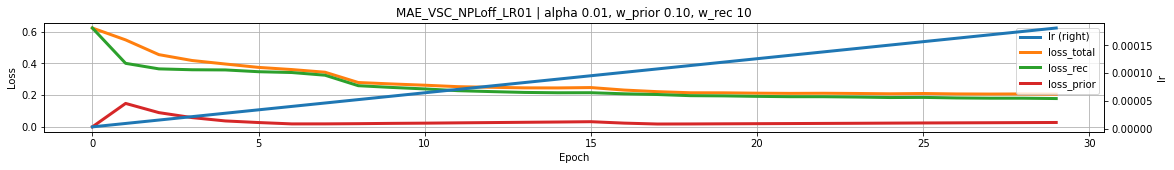

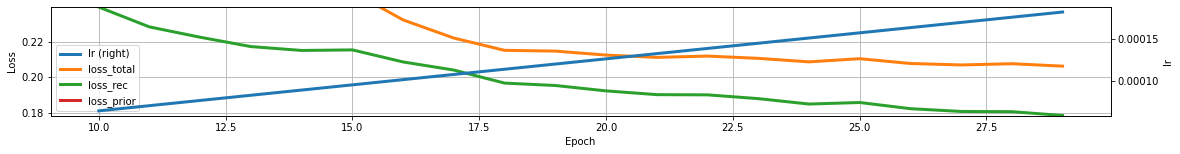

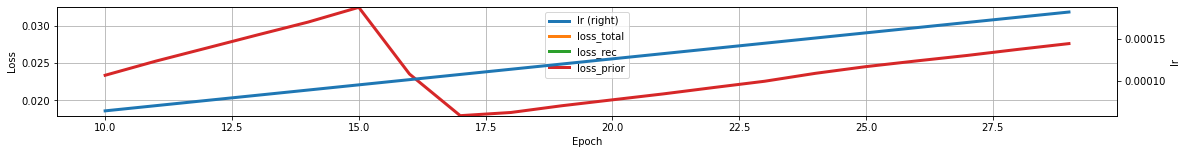

In [943]:
_, lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch = next(iter(loss_log[-1:].itertuples()))
start_epoch = -20
logy=False; figsize=(19, 2)
loss_prior_ = loss_log[start_epoch: ].loss_prior
loss_rec_ = loss_log[start_epoch: ].loss_rec
ylim_rec = (min(loss_rec_)*0.999, max(loss_rec_))
ylim_prior = (min(loss_prior_)*0.999, max(loss_prior_)*1.001)
# print(lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch)

title = f'MAE_VSC_NPLoff_LR01 | alpha {alpha}, w_prior {w_prior:.2f}, w_rec {w_rec:.0f}'
print(f'{title}, epoch{epoch:.0f}')
loss_log_ = loss_log[["lr", "loss_total", "loss_rec", "loss_prior", "epoch"]]
plot_loss(loss_log_, figsize=(19, 2), title=title, logy=logy)
plot_loss(loss_log_, figsize=figsize, start=start_epoch, logy=logy, ylim=ylim_rec)
plot_loss(loss_log_, figsize=figsize, start=start_epoch, logy=logy, ylim=ylim_prior)

In [939]:
file = 'log_mae_vsc_eBird_Sample.txt'
cols = ["lr", "w_rec", "w_prior", "loss_total", "loss_rec", "loss_prior", "epoch"]
loss_log = load_loss(file, cols=cols)
# loss_log = loss_log[-65:-14]
loss_log.tail()


,lr,w_rec,w_prior,loss_total,loss_rec,loss_prior,epoch
2254,0.000176,10.0,0.01,0.151282,0.141590,0.009693,597.0
2255,0.000176,10.0,0.01,0.150696,0.141009,0.009687,598.0
2256,0.000176,10.0,0.01,0.150799,0.141120,0.009680,599.0
2257,0.000176,10.0,0.01,0.151106,0.141495,0.009611,600.0
2258,0.000175,10.0,0.01,0.150587,0.140955,0.009632,601.0


MAE_VSC_NPLoff_LR01 | alpha 0.01, w_prior 0.01, w_rec 10, epoch601


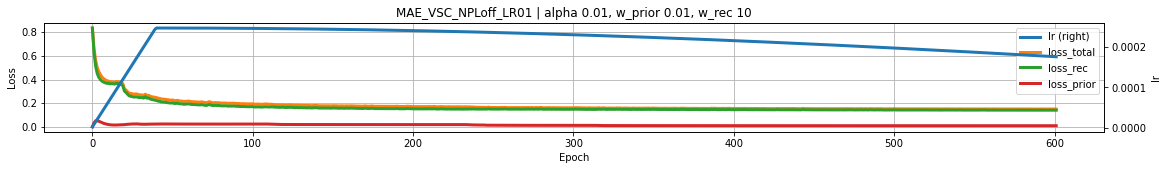

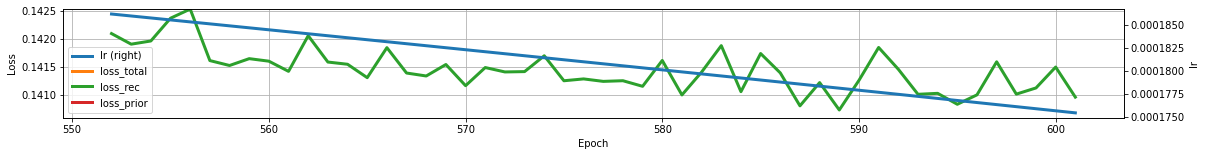

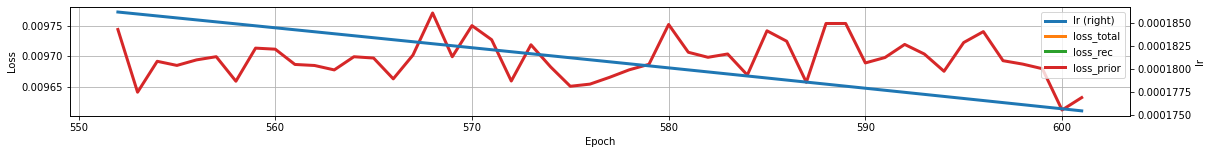

In [940]:
_, lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch = next(iter(loss_log[-1:].itertuples()))
start_epoch = -50
logy=False; figsize=(19, 2)
loss_prior_ = loss_log[start_epoch: ].loss_prior
loss_rec_ = loss_log[start_epoch: ].loss_rec
ylim_rec = (min(loss_rec_)*0.999, max(loss_rec_))
ylim_prior = (min(loss_prior_)*0.999, max(loss_prior_)*1.001)
# print(lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch)

title = f'MAE_VSC_NPLoff_LR01 | alpha {alpha}, w_prior {w_prior:.2f}, w_rec {w_rec:.0f}'
print(f'{title}, epoch{epoch:.0f}')
loss_log_ = loss_log[["lr", "loss_total", "loss_rec", "loss_prior", "epoch"]]
plot_loss(loss_log_, figsize=(19, 2), title=title, logy=logy)
plot_loss(loss_log_, figsize=figsize, start=start_epoch, logy=logy, ylim=ylim_rec)
plot_loss(loss_log_, figsize=figsize, start=start_epoch, logy=logy, ylim=ylim_prior)

In [807]:
file = 'log_mae_vsc_eBird_Sample.txt'
cols = ["lr", "w_rec", "w_prior", "loss_total", "loss_rec", "loss_prior", "epoch"]
loss_log = load_loss(file, cols=cols)
# loss_log = loss_log[-65:-14]
loss_log.tail()


,lr,w_rec,w_prior,loss_total,loss_rec,loss_prior,epoch
1409,0.00023,10.0,1.000000e-07,0.133159,0.133128,0.000031,296.0
1410,0.00023,10.0,1.000000e-07,0.133048,0.133017,0.000031,297.0
1411,0.00023,10.0,1.000000e-07,0.132917,0.132886,0.000031,298.0
1412,0.00023,10.0,1.000000e-07,0.132696,0.132665,0.000031,299.0
1413,0.00023,10.0,1.000000e-07,0.132873,0.132841,0.000031,300.0


MAE_VSC_NPLoff_LR01 | alpha 0.01, w_prior 0.00000, w_rec 10, epoch300


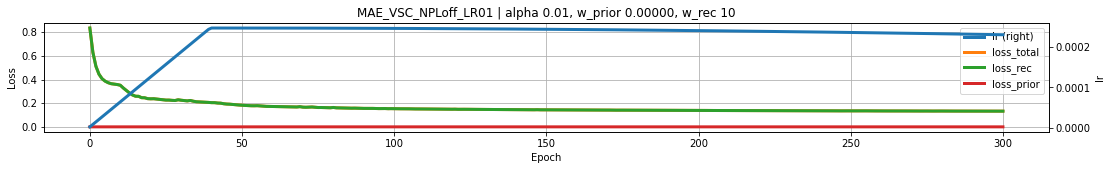

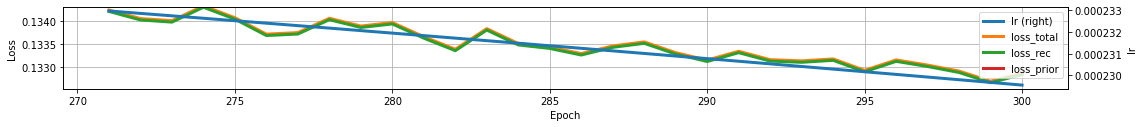

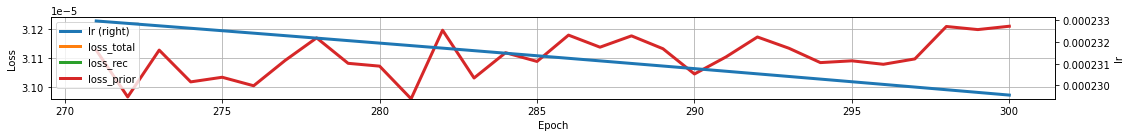

In [810]:
_, lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch = next(iter(loss_log[-1:].itertuples()))
start_epoch = -30
logy=False; figsize=(18, 1.5)
loss_prior_ = loss_log[start_epoch: ].loss_prior
loss_rec_ = loss_log[start_epoch: ].loss_rec
ylim_rec = (min(loss_rec_)*0.999, max(loss_rec_))
ylim_prior = (min(loss_prior_), max(loss_prior_)*1.001)
# print(lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch)

title = f'MAE_VSC_NPLoff_LR1 | alpha {alpha}, w_prior {w_prior:.5f}, w_rec {w_rec:.0f}'
print(f'{title}, epoch{epoch:.0f}')
loss_log_ = loss_log[["lr", "loss_total", "loss_rec", "loss_prior", "epoch"]]
plot_loss(loss_log_, figsize=(18, 2.), title=title, logy=logy)
plot_loss(loss_log_, figsize=figsize, start=start_epoch, logy=logy, ylim=ylim_rec)
plot_loss(loss_log_, figsize=figsize, start=start_epoch, logy=logy, ylim=ylim_prior)

In [611]:
file = 'log_mae_vsc_eBird_Sample.txt'
cols = ["lr", "w_rec", "w_prior", "loss_total", "loss_rec", "loss_prior", "epoch"]
loss_log = load_loss(file, cols=cols)
# loss_log = loss_log[-65:-14]
loss_log.tail()


,lr,w_rec,w_prior,loss_total,loss_rec,loss_prior,epoch
814,0.002446,10.0,0.1,0.284605,0.273725,0.010880,117.0
815,0.002446,10.0,0.1,0.284851,0.273960,0.010891,118.0
816,0.002445,10.0,0.1,0.284249,0.273325,0.010923,119.0
817,0.002445,10.0,0.1,0.283667,0.272709,0.010958,120.0
818,0.002444,10.0,0.1,0.283068,0.272111,0.010957,121.0


MAE_VSC_NPLOn | alpha 0.01, w_prior 0.10, w_rec 10


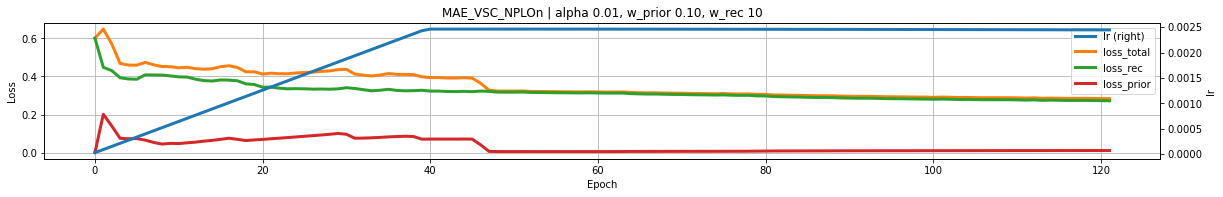

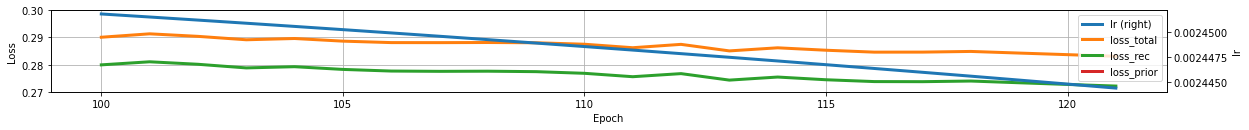

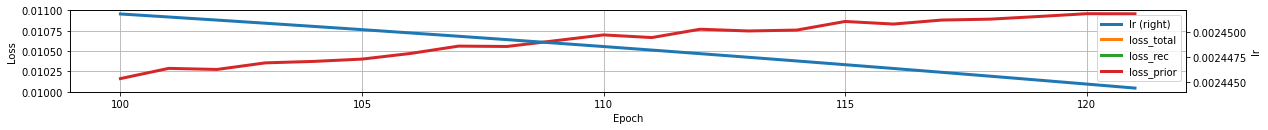

In [619]:
_, lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch = next(iter(loss_log[-1:].itertuples()))
# print(lr, w_rec, w_prior, loss_total, loss_rec, loss_prior, epoch)

title = f'MAE_VSC_NPLOn | alpha {alpha}, w_prior {w_prior:.2f}, w_rec {w_rec:.0f}'
print(title)
start=100; logy=False; figsize=(20, 1.5)
loss_log_ = loss_log[["lr", "loss_total", "loss_rec", "loss_prior", "epoch"]]
plot_loss(loss_log_, figsize=(20, 2.5), title=title, logy=logy)
plot_loss(loss_log_, figsize=figsize, start=start, logy=logy, ylim=(0.27, 0.30))
plot_loss(loss_log_, figsize=figsize, start=start, logy=logy, ylim=(0.01, 0.011))

---

In [461]:
file = 'log.txt'
cols = ["train_lr", "train_loss", "epoch",] 
loss_log = load_loss(file, cols=cols)
loss_log 

,train_lr,train_loss,epoch
0,0.000029,0.978411,0.0
1,0.000088,0.503263,1.0
2,0.000146,0.464569,2.0
3,0.000205,0.433729,3.0
4,0.000264,0.406215,4.0
...,...,...,...
1181,0.001523,0.335067,6.0
1182,0.001757,0.325048,7.0
1183,0.001992,0.318662,8.0
1184,0.002226,0.325519,9.0


AttributeError: 'AxesSubplot' object has no attribute 'right_ax'

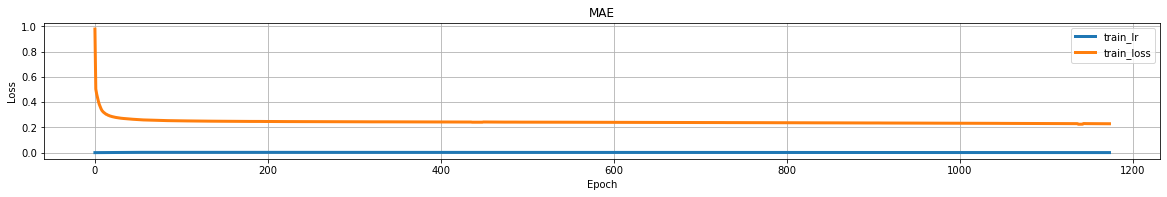

In [462]:
title = f'MAE'
start=150; logy=False; figsize=(20, 2)
plot_loss(loss_log[:-12], figsize=(20, 2.5), title=title, logy=logy)
plot_loss(loss_log[:-12], figsize=figsize, start=start, title=title, logy=logy, ylim=(0.225, 0.25))
